In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../lib/')
from frustration_graph import phase_transition
import pickle
import os
import copy
import time

In [2]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

ModuleNotFoundError: No module named 'dwave.system'

In [ ]:
res_path = "../../Results/Ising_Frustrated/Open/"

L = 20
ratios = np.arange(-1., 0.0, 0.1)

qpu = DWaveSampler()
sampler = EmbeddingComposite(qpu)

In [ ]:
ratios.shape

(100,)

## Frustrated Ising without Periodic Conditions

In [ ]:
filename = f"0/{ratios.size}_ratio_points.pickle"

if not os.path.isfile(res_path + filename):
    Magnetizations, Energies, Frequencies = phase_transition(L, ratios, sampler, 
                                                             num_reads=100)

    with open(res_path + filename, "wb") as file:
        pickle.dump([Magnetizations, Energies, Frequencies] , file)
else:
    with open(res_path + filename, "rb") as file:
        Magnetizations, Energies, Frequencies = pickle.load(file)

## Creating transition phase graph

In [ ]:
n = len(Magnetizations)

Mag = []
Chi = []

for i in range(n):
    M = np.array(Magnetizations[i])
    F = np.array(Frequencies[i])
    
    M_mean = (M * F).sum() / F.sum()
    C = ((M - M_mean)**2 * F).sum() / F.sum()
    Mag.append(M_mean)
    Chi.append(C)

Text(0, 0.5, '|M|')

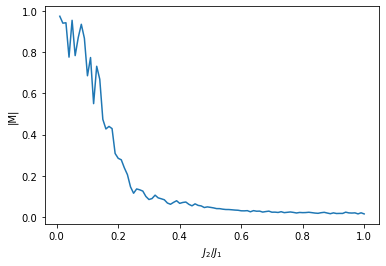

In [ ]:
plt.plot(np.abs(ratios), Mag)
plt.xlabel(r'$J_2$/$J_1$')
plt.ylabel('|M|')

Text(0, 0.5, '$\\chi$')

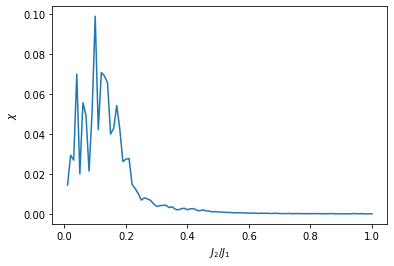

In [ ]:
plt.plot(np.abs(ratios), Chi)
plt.xlabel(r'$J_2$/$J_1$')
plt.ylabel(r'$\chi$')

## Phase transitions with CI

In [ ]:
for i in range(100): 
    filename = f"CI/{i}_{ratios.size}_ratio_points.pickle"

    if not os.path.isfile(res_path + filename):
        Magnetizations, Energies, 
        Frequencies = phase_transition(L, ratios, sampler, 
                                    num_reads=1000)

        with open(res_path + filename, "wb") as file:
            pickle.dump([Magnetizations, 
                        Energies, Frequencies] , file)
    else:
        with open(res_path + filename, "rb") as file:
            Magnetizations, Energies, Frequencies = pickle.load(file)

## Graph Plot

In [19]:
L = 20
Lattice_Size = (L, L)
periodic = True

C_G = nx.grid_graph(dim=Lattice_Size, periodic=periodic)

for x in range(1, L-1):
    for y in range(1, L-1):
        # diagonals on right
        x1, y1 = x+1, y+1
        C_G.add_edge((x, y), (x1, y1))
        
        x1, y1 = x-1, y+1
        C_G.add_edge((x, y), (x1, y1))
        
        # diagonals on left
        x1, y1 = x+1, y-1
        C_G.add_edge((x, y), (x1, y1))
        
        x1, y1 = x-1, y-1
        C_G.add_edge((x, y), (x1, y1))

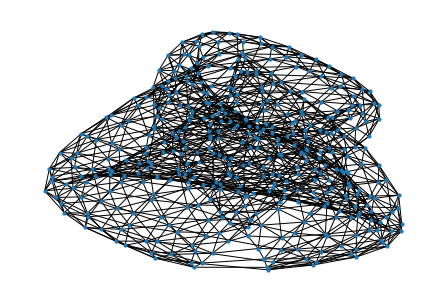

In [20]:
nx.draw(G=C_G, node_size=10)